In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import Regressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc('font',family="NanumGothic")

In [2]:
df_raw=pd.read_csv("BOSTON_HOUSING.csv",engine="python")
df_raw.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


In [3]:
df_raw.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [4]:
df_raw.isnull().sum() #결측치 현황
# 결측치 존재하지 않음

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [5]:
df_raw=pd.read_csv("BOSTON_HOUSING.csv",engine="python")
df_raw.describe().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,22.533,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653
std,9.197,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141
min,5.000,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730
25%,17.025,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950
50%,21.200,0.257,0.000,9.690,0.000,0.538,6.209,77.500,3.207,5.000,330.000,19.050,391.440,11.360
75%,25.000,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955
max,50.000,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970


# GrandientBoosting

In [6]:
df_raw.drop("CHAS",axis=1,inplace=True)

In [7]:
df_raw.head()

,MEDV,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [8]:
#목표변수, 설명변수 데이터 지정
df_raw_y=df_raw["MEDV"]
df_raw_x=df_raw.drop("MEDV",axis=1,inplace=False)

In [9]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(354, 12)
train data Y size :(354,)
test data X size :(152, 12)
test data Y size :(152,)


In [10]:
# rf_uncustomized=GradientBoostingRegressor(random_state=1234)
# rf_uncustomized.fit(df_train_x,df_train_y)
# #Train 데이터 설명력
# print("Score on training set:{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))
# #Test 데이터 설명력
# print("Score on test set:{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

In [11]:
# #train 및 test 설명력 결과 저장
# train_score = []
# test_score=[]
# #n_estmatos:트리수 변경 :1~100
# para_n_tree=[n_tree *10 for n_tree in range(1,11)]

# for v_n_estimators in para_n_tree:
#     rf=GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
#     rf.fit(df_train_x,df_train_y)
#     train_score.append(rf.score(df_train_x,df_train_y))
#     test_score.append(rf.score(df_test_x,df_test_y))
    
# # 결과 저장
# df_score_n=pd.DataFrame()
# df_score_n["n_estimators"]=para_n_tree
# df_score_n["TrainScore"]=train_score
# df_score_n["TestScore"]=test_score


In [12]:
# #모델 설명력 확인
# df_score_n.round(3)

## 1, 의사결정나무

In [13]:
estimator=DecisionTreeRegressor()
#구하고자 하는 parameter와 범위
param_grid={"max_depth":[depth for depth in range(1,11)],"min_samples_split":[n_split*2 for n_split in range(2,20)],"min_samples_leaf":[n_leaf * 1 for n_leaf in range(1,20)]}
#설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

best parameter:
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 14}

best score:
0.766


In [14]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 5,min_samples_split = 8,max_depth = 9,random_state = 1234,)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1234, splitter='best')

In [15]:
# Train 데이터 설명력
print("Score on training set:{:.3f}".format(tree_final.score(df_train_x,df_train_y)))
# Validation 데이터 설명력
print("Score on Test set:{:.3f}".format(tree_final.score(df_test_x,df_test_y)))

Score on training set:0.924
Score on Test set:0.858


#### 변수 중요도 

In [16]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_


df_importance.sort_values("Importance",ascending = False,inplace = True)
df_importance.round(3)

,Feature,Importance
11,LSTAT,0.578
4,RM,0.288
6,DIS,0.093
10,B,0.010
8,TAX,0.009
0,CRIM,0.008
9,PTRATIO,0.007
3,NOX,0.005
2,INDUS,0.001
1,ZN,0.000


Text(0, 0.5, '변수')

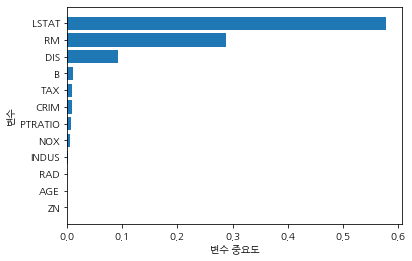

In [17]:
df_importance.sort_values("Importance",ascending = True,inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates,width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 2, 랜덤포레스트

In [20]:
estimator=RandomForestRegressor(random_state=1234)
#구하고자 하는 parameter와 범위
param_grid={"max_depth":[depth for depth in range(1,11)],"min_samples_split":[n_split *2 for n_split in range(2,21)],"min_samples_leaf":[n_leaf *1 for n_leaf in range(1,21)]}
#설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1234, verbose=0, warm_start=False)

best parameter:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}

best score:
0.808


In [23]:

rf_final = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 4, max_depth = 10, random_state = 1234)

rf_final.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.975
Score on test set : 0.898


#### 설명 변수의 중요도

In [26]:
v_feature_name=df_train_x.columns
df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_name
df_importance["Importance"]=rf_final.feature_importances_

 

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)


,Feature,Importance
11,LSTAT,0.485
4,RM,0.332
6,DIS,0.071
0,CRIM,0.024
3,NOX,0.019
9,PTRATIO,0.018
5,AGE,0.013
8,TAX,0.012
10,B,0.012
2,INDUS,0.008


Text(0, 0.5, 'Variables')

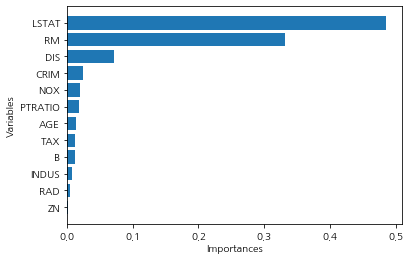

In [27]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importances")
plt.ylabel('Variables')

변수의 중요도 

## 그레디언트부스팅

In [28]:
estimator=GradientBoostingRegressor(random_state=1234)
#구하고자 하는 parameter와 범위
param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":["auto","sqrt","log2"],"learning_rate":[lr*0.1 for lr in range(1,11)],
           "max_depth":[depth for depth in range(1,11)]
,"min_samples_leaf":[n_leaf *1 for n_leaf in range(1,21)]}
#설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))

best estimator model:
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=6,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

best parameter:
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2}

best score:
0.853


In [32]:
gb_final = GradientBoostingRegressor(n_estimators = 100, min_samples_leaf = 2,  max_depth = 5, learning_rate = 0.1)

gb_final.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.998
Score on test set : 0.901


In [33]:
# v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance['Feature'] = df_train_x.columns
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
11,LSTAT,0.527
4,RM,0.269
6,DIS,0.095
9,PTRATIO,0.031
3,NOX,0.018
0,CRIM,0.017
10,B,0.013
8,TAX,0.012
5,AGE,0.011
2,INDUS,0.005


Text(0, 0.5, 'Variables')

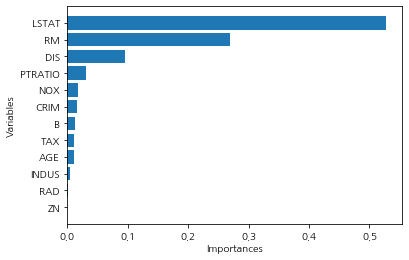

In [34]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("Importances")
plt.ylabel('Variables')